<h1><center> <font color='Blue'>LOAN ELIGIBILITY STATUS PREDICTION </font> <center> </h1>

In [4]:
'''
Problem Statement :
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling 
online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, 
Credit History and others. To automate this process, they have given a problem to identify the customers segments, 
those are eligible for loan amount so that they can specifically target these customers. Here they have provided a 
partial data set.

'''

'\nProblem Statement :\nCompany wants to automate the loan eligibility process (real time) based on customer detail provided while filling \nonline application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, \nCredit History and others. To automate this process, they have given a problem to identify the customers segments, \nthose are eligible for loan amount so that they can specifically target these customers. Here they have provided a \npartial data set.\n\n'

## Data Pre-processing

### Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset into pandas dataframe

In [4]:
#loading the dataset into dataframe
loan_dataset = pd.read_csv('Loan_Data.csv')
loan_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
#number of rows & columns
loan_dataset.shape

(614, 13)

### Data cleaning

In [6]:
#Renaming the column
loan_dataset.rename(columns ={'ApplicantIncome':'Applicant_Income', 'CoapplicantIncome':'Co-Applicant_Income',
                            'LoanAmount':'Loan_Amount'},inplace= True)
loan_dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co-Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
#statistical measure
loan_dataset.describe()

,Applicant_Income,Co-Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#number of missing values in each columns
loan_dataset.isnull().sum()

Loan_ID                 0
Gender                 13
Married                 3
Dependents             15
Education               0
Self_Employed          32
Applicant_Income        0
Co-Applicant_Income     0
Loan_Amount            22
Loan_Amount_Term       14
Credit_History         50
Property_Area           0
Loan_Status             0
dtype: int64

In [9]:
loan_dataset.dropna(inplace = True)

In [10]:
#number of missing values in each columns
loan_dataset.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Co-Applicant_Income    0
Loan_Amount            0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64

In [11]:
#Printing all the columns in the dataframe
z =loan_dataset.columns
z

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Co-Applicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [12]:
#counting distinct value  in  each column
for column in z:
    print('column name -', column)
    value = loan_dataset[column].value_counts()
    print(value)
   

column name - Loan_ID
LP001003    1
LP001005    1
LP002347    1
LP002345    1
LP002342    1
           ..
LP001674    1
LP001673    1
LP001666    1
LP001665    1
LP002990    1
Name: Loan_ID, Length: 480, dtype: int64
column name - Gender
Male      394
Female     86
Name: Gender, dtype: int64
column name - Married
Yes    311
No     169
Name: Married, dtype: int64
column name - Dependents
0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64
column name - Education
Graduate        383
Not Graduate     97
Name: Education, dtype: int64
column name - Self_Employed
No     414
Yes     66
Name: Self_Employed, dtype: int64
column name - Applicant_Income
2500    7
4583    6
2600    5
6000    4
4166    4
       ..
3418    1
3975    1
3244    1
4408    1
7583    1
Name: Applicant_Income, Length: 405, dtype: int64
column name - Co-Applicant_Income
0.0       216
1666.0      5
2500.0      4
5625.0      3
2083.0      3
         ... 
1250.0      1
3021.0      1
983.0       1
1775.0    

In [13]:
# replacing the value of 3+ to 4 in 'Dependents' column
loan_dataset['Dependents']=loan_dataset['Dependents'].replace(to_replace ='3+',value = 4)

In [14]:
#counting distinct value in 'Dependents' column
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

### Data visualisation

<AxesSubplot:xlabel='Education', ylabel='count'>

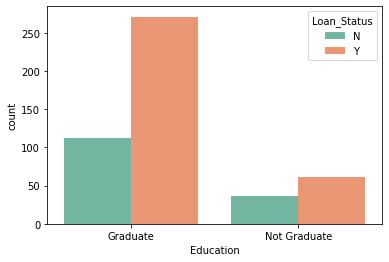

In [15]:
# Education & Loan Eligibility Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset, palette="Set2")

<AxesSubplot:xlabel='Married', ylabel='count'>

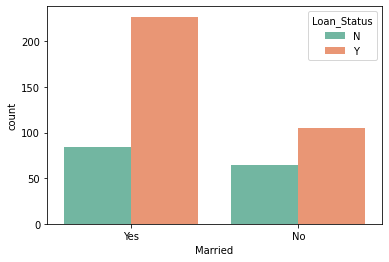

In [16]:
# Marital status & Loan Eligibility Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset, palette="Set2")

### Converting categorical values into numerical values

In [17]:
loan_dataset.replace({'Married' :{'Yes':1 , 'No':0}, 'Gender':{'Male':1,'Female':0},'Education':{'Graduate':1,'Not Graduate':0},
                      'Self_Employed':{'Yes':1,'No':0}, 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},"Loan_Status":{'N':0,'Y':1}}, 
                     inplace = True)

In [18]:
loan_dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co-Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


### Extracting dependent and independent Variables

In [19]:
X=loan_dataset.drop(columns = ['Loan_ID','Loan_Status'],axis=1)
Y=loan_dataset['Loan_Status']

###  Splitting the dataset into training and testing set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [21]:
X_test.shape

(48, 11)

In [22]:
 X_train.shape

(432, 11)

## Model Making& Training

### Support Vector Machine Model

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC(kernel='linear')

In [24]:
#training the support Vector Macine model
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [25]:
X_train_prediction=model.predict(X_train)

In [26]:
# accuracy score on training data
train_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', train_data_accuray)

Accuracy on training data :  0.7986111111111112


In [27]:
X_test_prediction = model.predict(X_test)

In [28]:
# accuracy score on testing data
test_data_accuray = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on testing data : ',test_data_accuray)

Accuracy on testing data :  0.8333333333333334


## Making a predictive system

In [29]:
import warnings
warnings.filterwarnings('ignore') 

def prediction_value():
    input_array=np.asarray(input_list)
    input_reshape = input_array.reshape(1,-1)
    status = model.predict(input_reshape)
    print("Loan Status-",status)
    if status==0:
        print("Person Not Eligible For Loan")
    else:
        print('Person Eligible For Loan')


input_list = [float(x) for x in input().split()]
prediction_value()



#input - 1 1 1 1 0 4500.50 1300.35 190.90 360 0 1

1 1 1 1 0 4500.50 1300.35 190.90 360 0 1
Loan Status- [0]
Person Not Eligible For Loan
